In [5]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [4]:
curvas = pd.read_csv("data/analisis_alfalfa/cycles_all.dat", sep=";")
curvas.head()

tau  ciclo_a2  ciclo_a5  ciclo_a6  ciclo_a7  ciclo_a8  ciclo_b1  \
0  0.000   0.08368   0.18706   0.30749   0.05260   0.34916   0.16852   
1  0.025   0.12953   0.08763   0.34628   0.21379   0.29988   0.18610   
2  0.050   0.17098   0.03246   0.37614   0.25630   0.27057   0.19487   
3  0.075   0.20778   0.14464   0.36757   0.29937   0.25198   0.21350   
4  0.100   0.24753   0.17777   0.37192   0.30343   0.27563   0.22031   

   ciclo_b3  ciclo_b4  ciclo_b5  ciclo_b6  ciclo_b7  ciclo_b8  mean_val  \
0   0.27118   0.08369   0.29095   0.13081   0.25767   0.12464  0.192287   
1   0.26174   0.10273   0.29575   0.15733   0.23871   0.12954  0.204084   
2   0.25435   0.11379   0.30898   0.16531   0.22313   0.13855  0.208786   
3   0.24226   0.12341   0.33622   0.17093   0.24315   0.14899  0.229150   
4   0.23840   0.13273   0.35841   0.18315   0.27509   0.16420  0.245714   

     deviat  
0  0.095814  
1  0.081586  
2  0.088959  
3  0.073758  
4  0.072088

In [49]:
tiempo = curvas.tau.values
crecimiento = curvas.ciclo_b4.values

   tiempo  crecimiento  crecimiento_lag_1  crecimiento_lag_2  \
4   0.100      0.13273            0.12341            0.11379   
5   0.125      0.14624            0.13273            0.12341   
6   0.150      0.15471            0.14624            0.13273   
7   0.175      0.16744            0.15471            0.14624   
8   0.200      0.18709            0.16744            0.15471   

   crecimiento_lag_3  crecimiento_lag_4  
4            0.10273            0.08369  
5            0.11379            0.10273  
6            0.12341            0.11379  
7            0.13273            0.12341  
8            0.14624            0.13273  
Error cuadrático medio: 0.005241881466490916


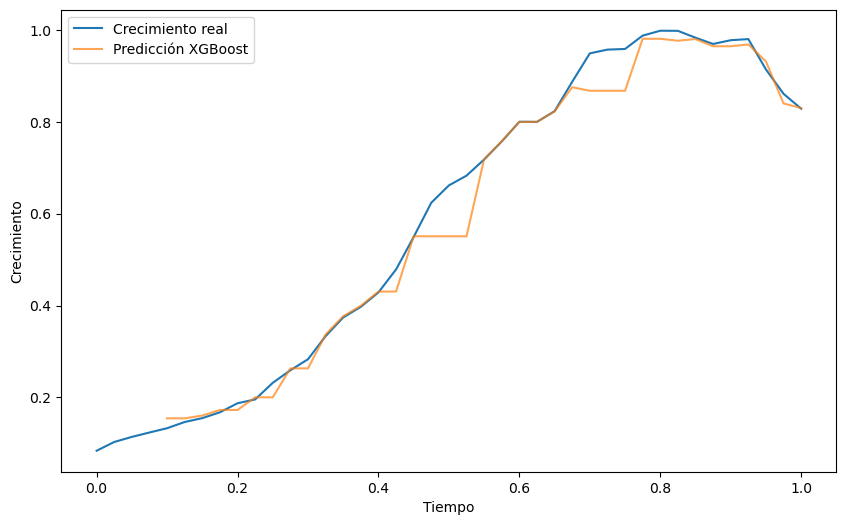

In [50]:
# Datos de ejemplo (tiempo, crecimiento siguiendo una curva logística)
#tiempo = np.arange(0, 10, 0.01)
#K = 25  # Capacidad de carga
#r = 0.3  # Tasa de crecimiento
#t0 = 5  # Tiempo al cual el crecimiento es máximo
#crecimiento = K / (1 + np.exp(-r * (tiempo - t0)))



data = pd.DataFrame({'tiempo': tiempo, 'crecimiento': crecimiento})

# Crear características de retraso (lag features)
def create_lag_features(df, lag=3):
    for i in range(1, lag+1):
        df[f'crecimiento_lag_{i}'] = df['crecimiento'].shift(i)
    df.dropna(inplace=True)
    return df

# Crear características de retraso de 1 a 3 días
df = create_lag_features(data, lag=4)
print(df.head())

# Separar características y objetivo
X = df.drop(columns=['crecimiento', 'tiempo'])
y = df['crecimiento']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.05, max_depth=3)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio: {mse}')

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(tiempo, crecimiento, label='Crecimiento real')
plt.plot(df['tiempo'], model.predict(X), label='Predicción XGBoost', alpha=0.7)
plt.xlabel('Tiempo')
plt.ylabel('Crecimiento')
plt.legend()
plt.show()